### Paddy Doctor Dataset - Exploratory  Data Analysis
ack: https://www.kaggle.com/code/cheremgena/simple-cnn-problems-with-rare-classes

In [11]:
import os
import glob
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#sns.set_theme(style="white")
#sns.set_style('white')
sns.set(font_scale=1.2)

data_path = '/kaggle/input/paddy-doctor-diseases-small/'
for filepath in glob.glob(data_path + '/*/'):
    files = glob.glob(filepath + '*')
    print(f"{len(files)} \t {Path(filepath).name}")

1951 	 tungro
765 	 yellow_stem_borer
2151 	 hispa
868 	 downy_mildew
506 	 black_stem_borer
505 	 bacterial_leaf_streak
648 	 bacterial_leaf_blight
1257 	 brown_spot
2351 	 blast
1095 	 leaf_roller
2405 	 normal
450 	 bacterial_panicle_blight
1273 	 white_stem_borer


In [2]:
meta = pd.read_csv(os.path.join(data_path, 'metadata.csv'))
meta.head()

,image_id,label,variety,age
0,PDD00001.jpg,bacterial_leaf_blight,45,65
1,PDD00002.jpg,bacterial_leaf_blight,45,60
2,PDD00003.jpg,bacterial_leaf_blight,45,55
3,PDD00004.jpg,bacterial_leaf_blight,KarnatakaPonni,50
4,PDD00005.jpg,bacterial_leaf_blight,45,72


In [3]:
# ## distribution of labels
# meta.groupby('label')['label'].count().sort_values().plot.barh(figsize=(8,5))

In [4]:
# ## distribution of labels in percentage
# (meta.groupby('label')['label'].count().sort_values() / meta.shape[0] * 100).plot.barh(figsize=(8,5))

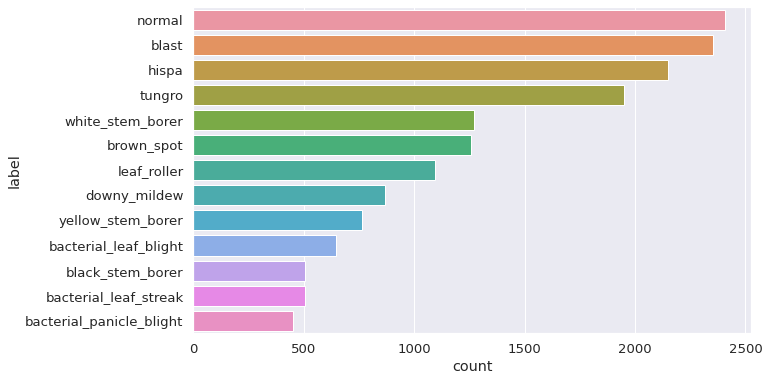

normal                      2405
blast                       2351
hispa                       2151
tungro                      1951
white_stem_borer            1273
brown_spot                  1257
leaf_roller                 1095
downy_mildew                 868
yellow_stem_borer            765
bacterial_leaf_blight        648
black_stem_borer             506
bacterial_leaf_streak        505
bacterial_panicle_blight     450
Name: label, dtype: int64


In [13]:
fig,ax = plt.subplots(figsize = (10, 6))
sns.countplot(y = 'label',
              data = meta,
              order = meta['label'].value_counts().index)
plt.show()
print(meta["label"].value_counts())

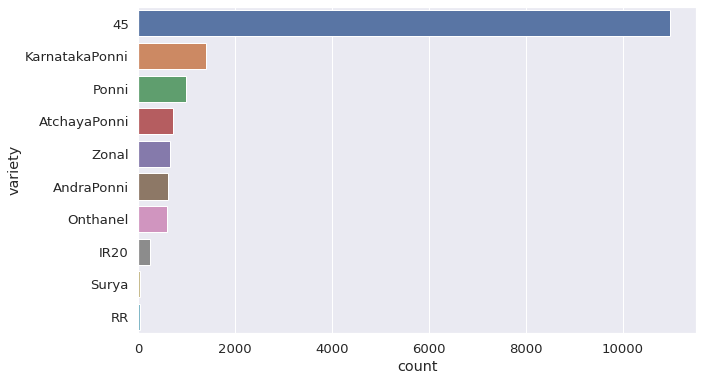

45                10978
KarnatakaPonni     1404
Ponni               975
AtchayaPonni        706
Zonal               649
AndraPonni          615
Onthanel            585
IR20                235
Surya                42
RR                   36
Name: variety, dtype: int64


In [14]:
fig,ax = plt.subplots(figsize = (10, 6))
sns.countplot(y = 'variety',
              data = meta,
              order = meta['variety'].value_counts().index)
plt.show()
print(meta["variety"].value_counts())

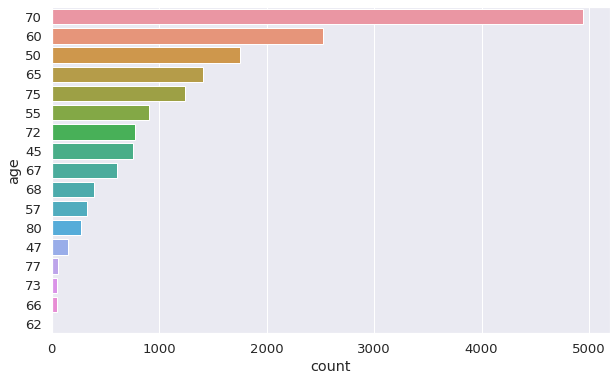

70    4945
60    2527
50    1748
65    1410
75    1243
55     907
72     774
45     756
67     608
68     390
57     326
80     276
47     149
77      61
73      50
66      48
62       7
Name: age, dtype: int64


In [7]:
fig,ax = plt.subplots(figsize = (10, 6))
sns.countplot(y = 'age',
              data = meta,
              order = meta['age'].value_counts().index)
plt.show()
print(meta["age"].value_counts())

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

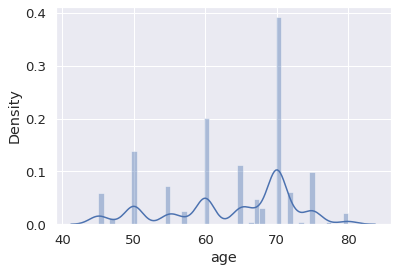

In [8]:
sns.distplot(meta["age"])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  


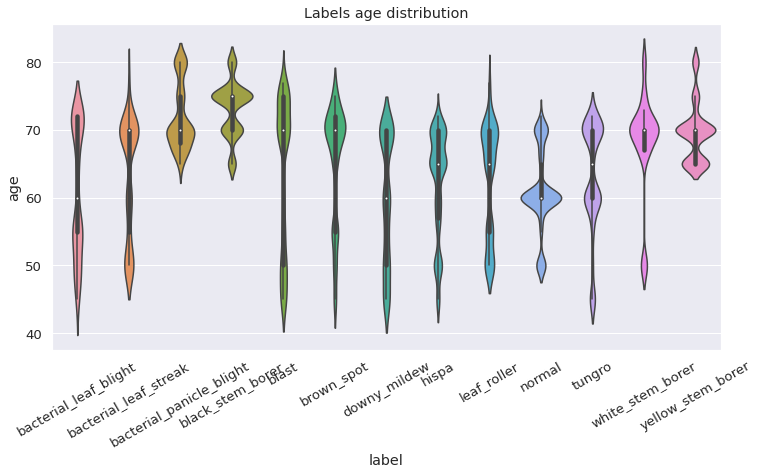

In [9]:
fig,ax = plt.subplots(figsize = (12, 6))
ax.set_xticklabels(meta["label"].index, rotation = 30)
ax.set_title("Labels age distribution")
sns.violinplot(x = "label", y = "age", data = meta)
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  


<AxesSubplot:xlabel='label', ylabel='count'>

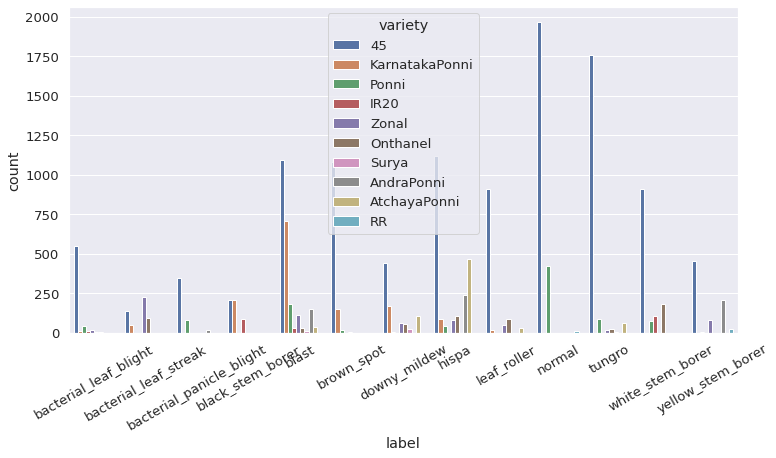

In [15]:
fig,ax = plt.subplots(figsize = (12, 6))
ax.set_xticklabels(meta["label"].index, rotation = 30)
sns.countplot(x = "label", hue = "variety", data = meta)

# fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (14, 18))
# ax[0].set_xticklabels(train_labels["label"].index, rotation = 30)
# sns.countplot(x = "label", hue = "variety", data = train_labels, ax = ax[0])
# sns.countplot(x = "label", hue = "variety", data = train_labels_rare, ax = ax[1])
# sns.violinplot(x = "variety", y = "age", ax = ax[2], data = train_labels)

# plt.tight_layout()
# plt.show()